In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("C:/Users/HP/Downloads/StudentsPerformance.csv")
data.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28


In [11]:
#Find out how many males and females participated in the test.
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [12]:
#What do you think about the students' parental level of education?
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Most of the students(226) have parents who studied in some college and Parents who have a master's degree are least in number(only 59).

In [13]:
data['average score'] = (data['math score'] + data['writing score'] + data['reading score']) / 3
data.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000


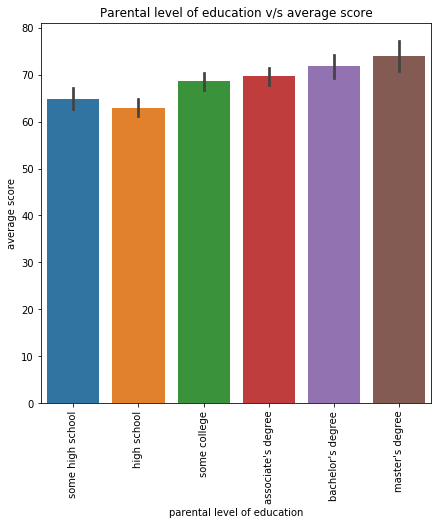

In [14]:
plt.figure(figsize= (7,7))
plt.title('Parental level of education v/s average score')
plt.xticks(rotation = 90)
sns.barplot(x = 'parental level of education', y = 'average score', data = data);

Students of highly educated parents have higher average score.

In [16]:
df = data.groupby(['parental level of education'])[['reading score', 'math score', 'writing score']].mean()
df.sort_values(['writing score', 'reading score', 'math score'],ascending = [False,False,False])

,reading score,math score,writing score
parental level of education,,,
master's degree,75.949153,70.254237,75.677966
bachelor's degree,73.000000,69.288136,73.381356
associate's degree,71.018018,67.977477,70.031532
some college,69.566372,67.128319,69.035398
some high school,66.759777,63.134078,64.888268
high school,64.602041,61.821429,62.403061


Students whose parents have Master's degree scored highest average mark in reading ,writing and math. This is followed by students whose parents have Bachelor's degree.This shows higher the parental level of education,higher the perfomace.

In [20]:
#Who scores the most on average for math, reading and writing based on
#● Gender
df = data.groupby(['gender'])['average score'].mean()
df

gender
female    69.478121
male      65.937759
Name: average score, dtype: float64

Females scored the most.

In [30]:
#● Test preparation course
df1 = data.groupby(['test preparation course'])['average score'].mean()
df1

test preparation course
completed    72.942272
none         64.888370
Name: average score, dtype: float64

Students who completed test preparation course scored the most.

In [27]:
df3=data.drop(['average score'], axis=1)
df3.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23


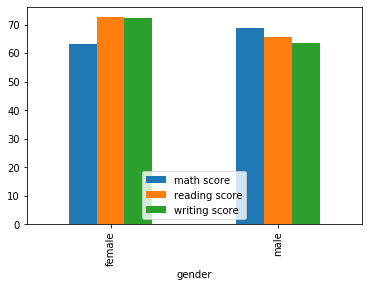

In [28]:
#What do you think about the scoring variation for math, reading and writing based on
#● Gender

df4=df3.groupby(['gender']).mean()
df4.plot.bar()

Females scored better on reading and writing score but males scored better on math score

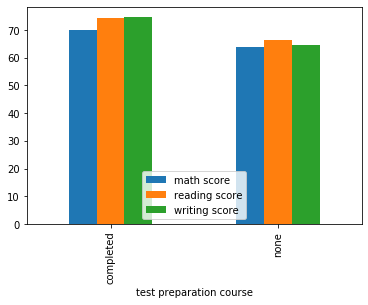

In [29]:
#● Test preparation course
df5=df3.groupby(['test preparation course']).mean()
df5.plot.bar()

Students who completed test preparation score scored higher than those who didn't complete in math,reading and writing .

In [42]:
#The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.
data['math score'].quantile(0.75) 

77.0

This implies top 25% students scored more than 77 marks in math. So we can derive those students to give them bonus and is done below

In [49]:
df3[df3['math score']>77]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
430,female,group A,some college,standard,completed,78,87,91
431,female,group B,bachelor's degree,free/reduced,none,78,79,76
432,female,group D,bachelor's degree,standard,none,78,82,79
433,female,group D,high school,standard,none,78,81,80
434,female,group D,bachelor's degree,free/reduced,none,78,90,93
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
